In [1]:
from helper import build_model, infer_classmap_f_generator

%matplotlib inline
import matplotlib.pyplot as plt
import tflearn.datasets.mnist as mnist


def plot_classmap(images, labels, infer_classmap_f, plot=False):

    values, answers, vis = infer_classmap_f(images, labels)
    if plot:
        for i in range(len(images)):
            f, ax = plt.subplots(1, 4)
            ax[0].imshow(images[i].reshape(28, 28))
            ax[0].imshow(
              vis[i], cmap=plt.cm.jet, alpha=0.5, interpolation='nearest')
            ax[1].imshow(images[i].reshape(28, 28))
            ax[2].imshow(values[i].reshape(28, 28))
            ax[3].imshow(answers[i].reshape(28, 28))
            print(labels[i])

    return values, answers, vis


X, Y, testX, testY = mnist.load_data(one_hot=True)
X = X.reshape([-1, 28, 28, 1])
testX = testX.reshape([-1, 28, 28, 1])

image_shape = [28, 28, 1]
n_classmap = 15
n_labels = 10

model, input_layer, label_layer, output_layer, conv_layer, classmap_layer = \
    build_model(image_shape, n_classmap, n_labels)


Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [2]:
model.load('models/mnist')

In [3]:
infer_classmap = infer_classmap_f_generator(
    model.session, n_labels, input_layer, label_layer,
    output_layer, conv_layer, classmap_layer)

In [4]:
idx = []
i = 0
for j in range(len(testX)):
    if testY[j][i] == 1:
        idx.append(j)
        i += 1
        if i == 10:
            break

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


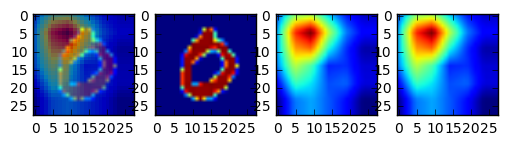

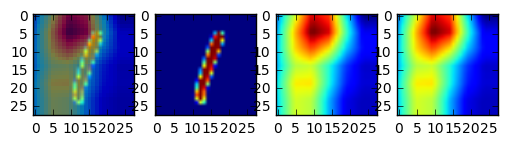

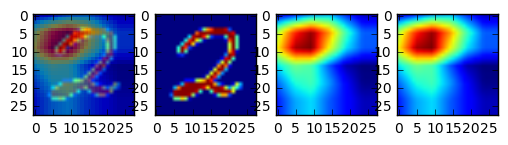

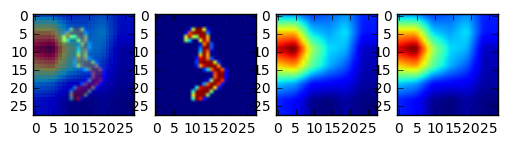

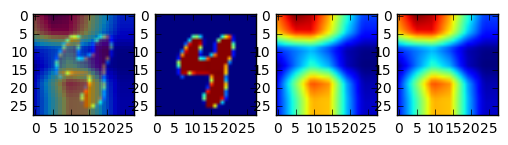

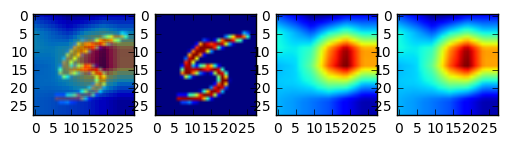

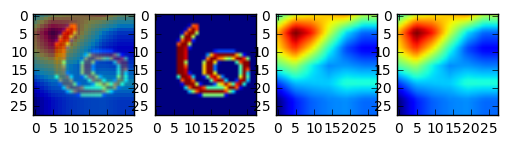

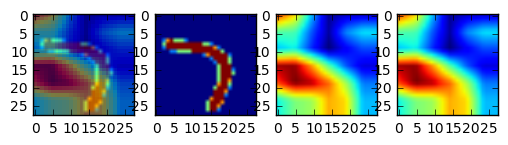

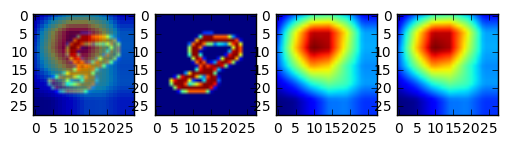

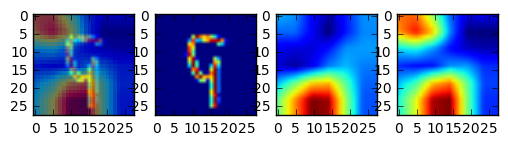

In [5]:
_ = plot_classmap(testX[idx], testY[idx], infer_classmap_f=infer_classmap, plot=True)